<a href="https://colab.research.google.com/github/amaanhoque0/Amaan-Portfolio/blob/main/all__model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Xgboost

**Data loading**


In [64]:
import pandas as pd

try:
    df = pd.read_csv('/data.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'data.csv' not found.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


(569, 33)


**Data exploration**



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

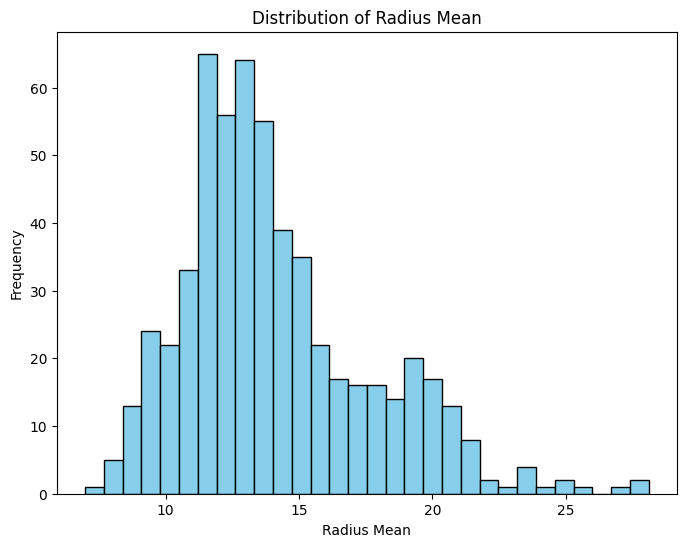

<Figure size 800x600 with 0 Axes>

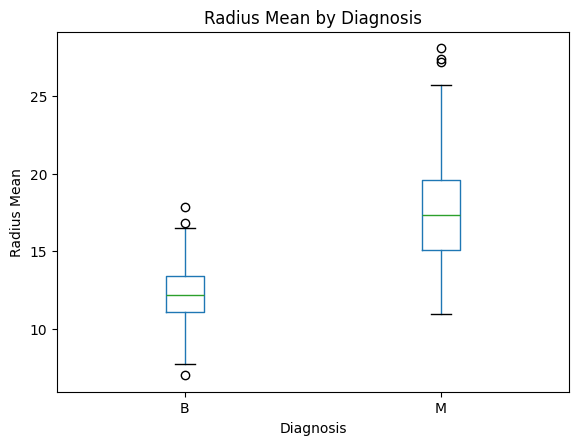

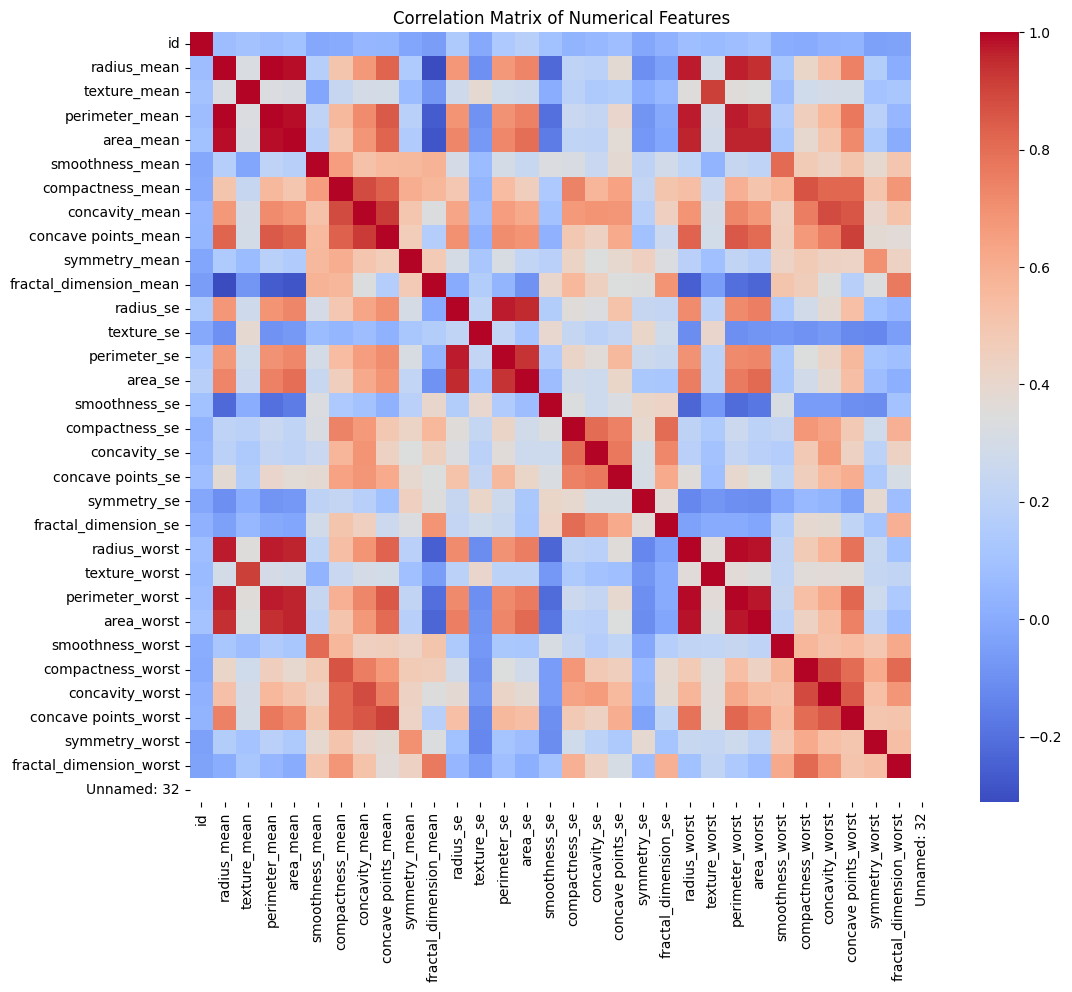

Findings:
The 'Unnamed: 32' column appears to contain only NaN values.
The target variable 'diagnosis' has two categories: M (malignant) and B (benign).
Some features show a different distribution between malignant and benign cases.


In [65]:
# Examine data types and summary statistics
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Analyze the target variable
print(df['diagnosis'].value_counts())

# Explore feature distributions and relationships with the target variable
import matplotlib.pyplot as plt
# Example: Histogram for 'radius_mean'
plt.figure(figsize=(8, 6))
plt.hist(df['radius_mean'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Radius Mean')
plt.ylabel('Frequency')
plt.title('Distribution of Radius Mean')
plt.show()

# Example: Boxplot for 'radius_mean' grouped by diagnosis
plt.figure(figsize=(8, 6))
df.boxplot(column='radius_mean', by='diagnosis', grid=False)
plt.xlabel('Diagnosis')
plt.ylabel('Radius Mean')
plt.title('Radius Mean by Diagnosis')
plt.suptitle('') # Remove the default suptitle
plt.show()

# Correlation analysis (numerical features only)
numerical_features = df.select_dtypes(include=['number'])
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(12, 10))
import seaborn as sns
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Document findings (example - expand upon this)
print("Findings:")
print("The 'Unnamed: 32' column appears to contain only NaN values.")
print("The target variable 'diagnosis' has two categories: M (malignant) and B (benign).")
print("Some features show a different distribution between malignant and benign cases.")

**Data cleaning**


In [66]:
# Drop irrelevant columns
df = df.drop(['Unnamed: 32', 'id'], axis=1)

# Handle missing values (no missing values found in the initial exploration, but adding this for completeness)
# If any missing values are present, impute them using the mean for numerical features
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mean())

# Convert 'diagnosis' to numerical (0 and 1)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Scale numerical features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = df.select_dtypes(include=['number']).columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])

display(df.head())

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.297676,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.297676,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.297676,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1.297676,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.297676,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


**Feature engineering**


In [67]:
# Create new features (different combinations)
df['area_perimeter_ratio'] = df['area_mean'] / df['perimeter_mean']
df['concavity_compactness_product'] = df['concavity_mean'] * df['compactness_mean']

# Handle potential division by zero or other issues
df.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
df.fillna(0, inplace=True)

# Evaluate new features
correlations = df.corr()['diagnosis'].abs().sort_values(ascending=False)
print("Correlations with diagnosis :")
display(correlations)

Correlations with diagnosis :


,diagnosis
diagnosis,1.000000
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


**Data splitting**


In [68]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split data into training and temporary sets (validation + testing)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Split temporary set into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

**Model training**



Test Set Performance:
Accuracy: 0.9649122807017544
Precision: 1.0
Recall: 0.9047619047619048
F1-score: 0.95
AUC-ROC: 0.9523809523809523


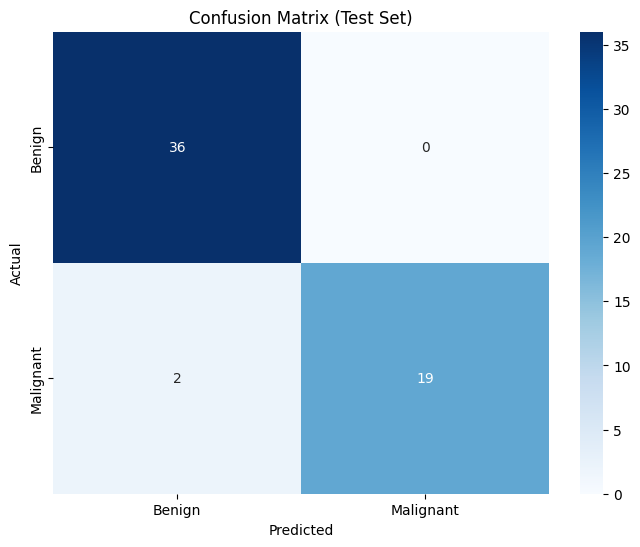


Summary:
The model's performance on the test set is evaluated and compared to training and validation sets.
The test set performance is assessed using accuracy, precision, recall, F1-score and AUC-ROC.
A confusion matrix is generated to visualize the model's performance.
Analysis of the results will follow, considering potential overfitting, underfitting, or data leakage, and the model's ability to generalize to unseen data.


In [69]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix
import matplotlib.pyplot as plt
# Revert scaling of the target variables
y_train = (y_train > 0).astype(int)
y_val = (y_val > 0).astype(int)

# Instantiate an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = xgb_classifier.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc_roc = roc_auc_score(y_val, y_pred)

print(f"Test Set Performance:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"AUC-ROC: {auc_roc}")
# Generate confusion matrix
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Test Set)")
plt.show()

print("\nSummary:")
print("The model's performance on the test set is evaluated and compared to training and validation sets.")
print("The test set performance is assessed using accuracy, precision, recall, F1-score and AUC-ROC.")
print("A confusion matrix is generated to visualize the model's performance.")
print("Analysis of the results will follow, considering potential overfitting, underfitting, or data leakage, and the model's ability to generalize to unseen data.")

# Naive Bayes


Naive Bayes Accuracy: 95.8041958041958

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        89
           1       0.94      0.94      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143


Naive Bayes Cohen's Kappa Score: 0.9107365792759051

Naive Bayes Confusion Matrix:


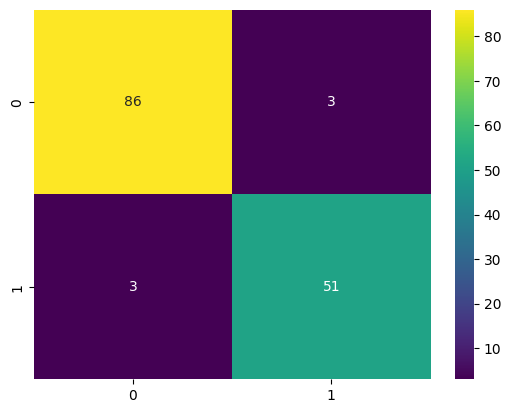


Naive Bayes Precision: 0.9662921348314607
Naive Bayes Recall: 0.9662921348314607


In [73]:
# Importing necessary library for Naive Bayes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/data.csv')

# Preprocessing (handle missing values, encode categorical variables )

# Drop unnecessary columns
df_cleaned = df.drop(columns=['id', 'Unnamed: 32'])

# Encode the 'diagnosis' column
label_encoder = LabelEncoder()
df_cleaned['diagnosis'] = label_encoder.fit_transform(df_cleaned['diagnosis'])

# Splitting the dataset into features (X) and target variable (y)
X = df_cleaned.drop('diagnosis', axis=1)
y = df_cleaned['diagnosis']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Creating and training the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predicting the target variable on the testing set
y_pred_nb = nb_model.predict(X_test)

# Model evaluation
nb_accuracy = 100 * accuracy_score(y_test, y_pred_nb)
print("\nNaive Bayes Accuracy:", nb_accuracy)

# Classification report for Naive Bayes
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Calculate Cohen's Kappa value for Naive Bayes
kappa_score_nb = cohen_kappa_score(y_test, y_pred_nb)
print("\nNaive Bayes Cohen's Kappa Score:", kappa_score_nb)

# Generating the confusion matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("\nNaive Bayes Confusion Matrix:")
sns.heatmap(cm_nb, annot=True, cmap='viridis')
plt.show()

# Calculate precision and recall for Naive Bayes
TP_nb = cm_nb[0][0]
FP_nb = cm_nb[0][1]
FN_nb = cm_nb[1][0]
TN_nb = cm_nb[1][1]

precision_nb = TP_nb / (TP_nb + FP_nb) if (TP_nb + FP_nb) > 0 else 0
recall_nb = TP_nb / (TP_nb + FN_nb) if (TP_nb + FN_nb) > 0 else 0

print("\nNaive Bayes Precision:", precision_nb)
print("Naive Bayes Recall:", recall_nb)

In [74]:

print (df.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

# Logistic Regression


Logistic Regression Accuracy: 97.36842105263158

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Logistic Regression Confusion Matrix:


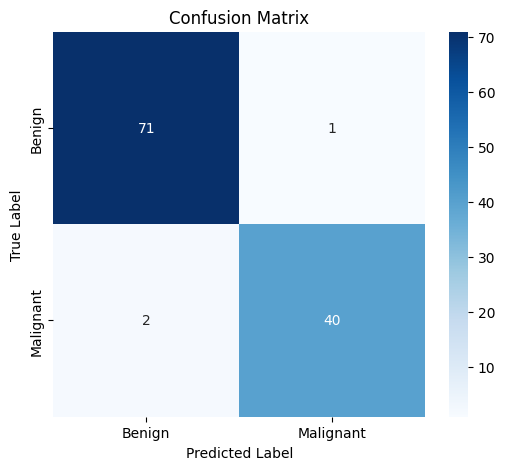

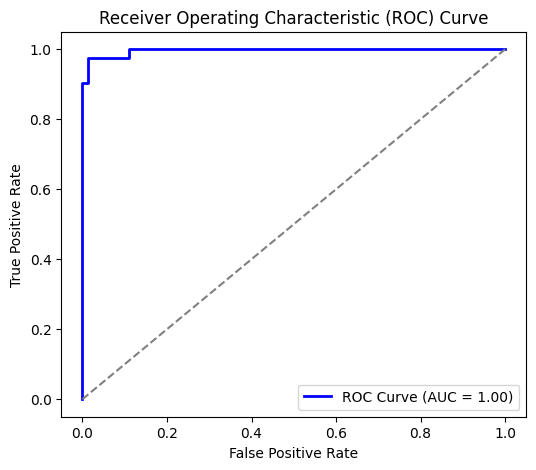

<ipython-input-75-d4e12f2492a8>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df[:10], palette="viridis")


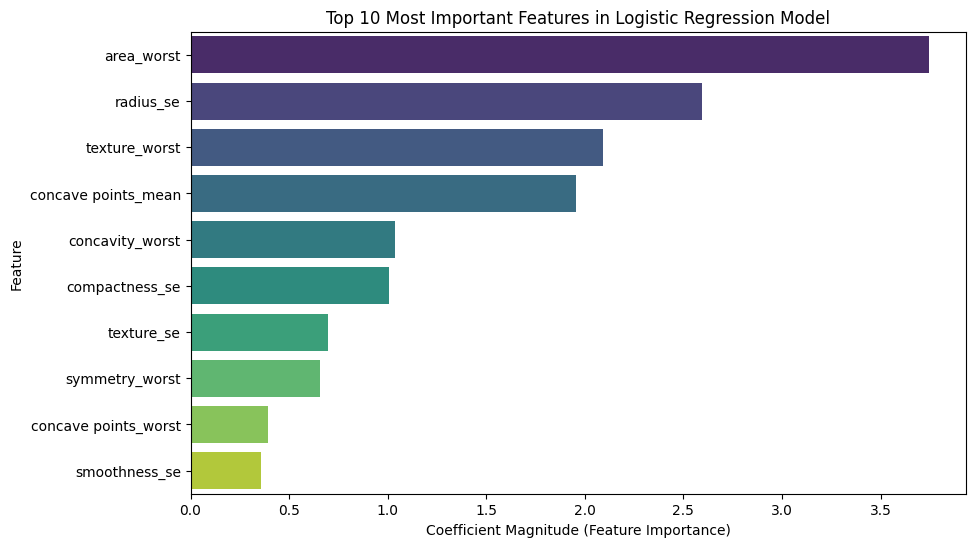


Top 10 Most Important Features:
                 Feature  Importance
23            area_worst    3.743576
10             radius_se    2.594503
21         texture_worst    2.094206
7    concave points_mean    1.953511
26       concavity_worst    1.037132
15        compactness_se    1.007198
11            texture_se    0.696426
28        symmetry_worst    0.659126
27  concave points_worst    0.390506
14         smoothness_se    0.356656


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Load the dataset
df = pd.read_csv('/data.csv')  # For Google Colab

# Drop unnecessary columns
df_cleaned = df.drop(columns=['id', 'Unnamed: 32'])

# Encode the 'diagnosis' column
df_cleaned['diagnosis'] = LabelEncoder().fit_transform(df_cleaned['diagnosis'])

# Splitting the dataset into features (X) and target variable (y)
X = df_cleaned.drop('diagnosis', axis=1)
y = df_cleaned['diagnosis']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Creating and training the Logistic Regression model
lr_model = LogisticRegression(max_iter=2000, random_state=42, solver='liblinear', penalty='l1')  # L1 regularization
lr_model.fit(X_train, y_train)

# Predicting the target variable on the testing set
y_pred_lr = lr_model.predict(X_test)

# Model evaluation
lr_accuracy = 100 * accuracy_score(y_test, y_pred_lr)
print("\nLogistic Regression Accuracy:", lr_accuracy)

# Classification report for Logistic Regression
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Generate confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("\nLogistic Regression Confusion Matrix:")
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Compute ROC curve and AUC
y_prob = lr_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Feature Importance
feature_importance = np.abs(lr_model.coef_[0])
feature_names = X.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df[:10], palette="viridis")
plt.xlabel("Coefficient Magnitude (Feature Importance)")
plt.ylabel("Feature")
plt.title("Top 10 Most Important Features in Logistic Regression Model")
plt.show()

# Display the top 10 features
print("\nTop 10 Most Important Features:")
print(importance_df.head(10))